In [1]:
# includes core parts of numpy, matplotlib
import matplotlib.pyplot as plt
import numpy as np

# include scipy's signal processing functions
import scipy.signal as signal

In [2]:
# sampling fequency
fs=256000 # 256KHz
data_fn =  "test/test.bin"

nfft = 256 # window size
noverlap = 128 # window overlap

In [3]:
# Read in raw I/Q interleaved 32-bit float samples
data = np.fromfile(data_fn, dtype="float32")

# Turn the interleaved I and Q samples into complex values
data = data[0::2] + 1j*data[1::2]

print(f"length: {len(data)} points, {len(data)/fs} seconds")

length: 74607 points, 0.29143359375 seconds


Text(0, 0.5, 'Frequency')

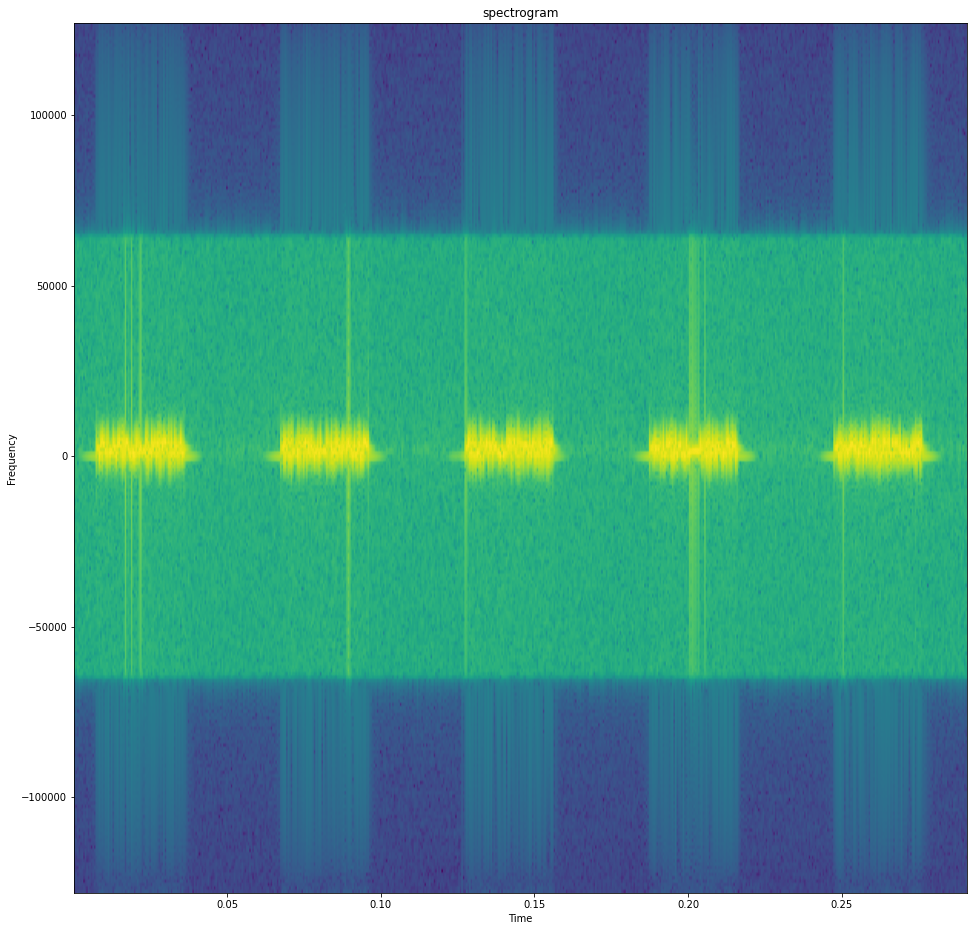

In [4]:
# Plot the spectogram using matplot
# matploblib中mode设置为magnitude和psd没有区别，不知道为什么？
# 与scipy.signal中的结果相比，应该是magnitude
plt.figure(figsize=(16, 16))
plt.specgram(data, NFFT=nfft, noverlap=noverlap, Fs=fs, mode = 'magnitude')
plt.title("spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

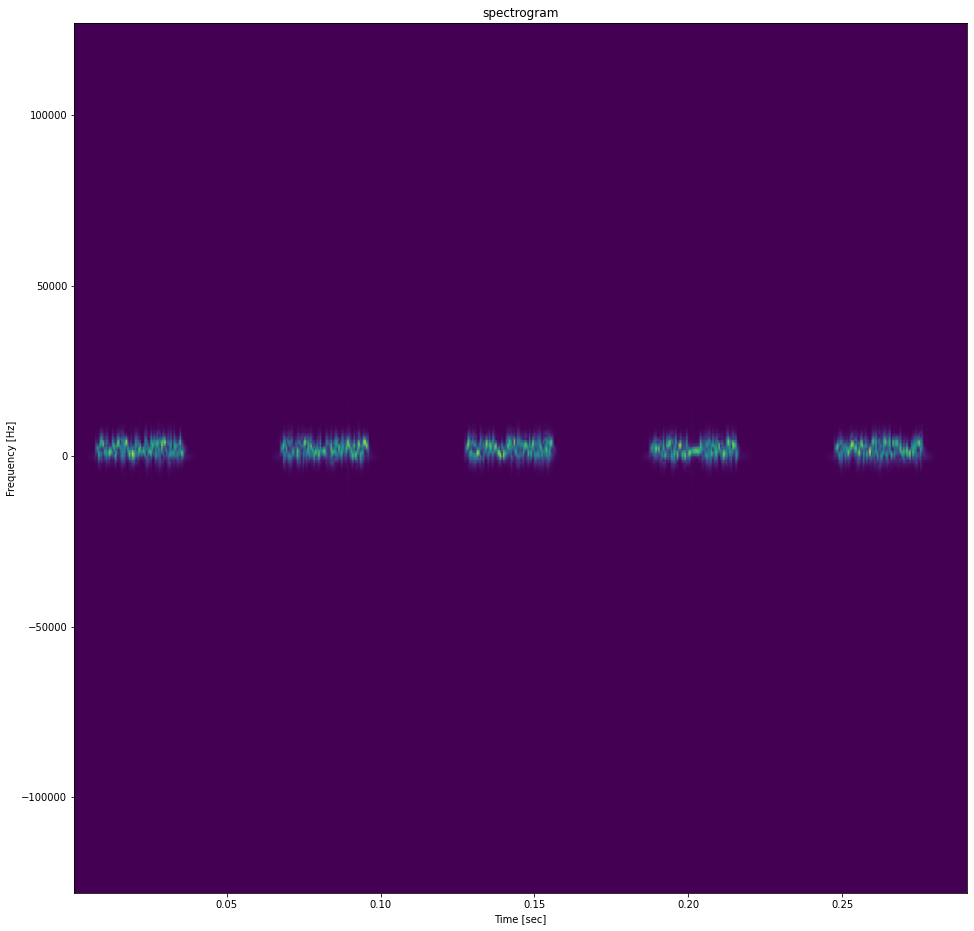

In [5]:
from scipy.fft import fftshift

# plot the spectrogram using scipy.signal
# 注意要把mode设置为magnitude

# calculate spectrogram using scipy.signal.spectrogram
# note: default detrend = constant, the mean of data is subtracted.
# however in matplotlib, default detrend = None, no detrend
# so here we keep the default of matplotlib
f1, t1, spectrogram = signal.spectrogram(data, fs, window='hann', nperseg=nfft, noverlap=noverlap, detrend = False, mode = 'magnitude', return_onesided = False)

plt.figure(figsize=(16, 16))
plt.pcolormesh(t1, fftshift(f1), fftshift(spectrogram, axes=0), shading='gouraud')
plt.title("spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

In [6]:
data.shape

(74607,)

In [7]:
win_ms = 20 # 20ms
win = int(win_ms * fs / 1000)
n = int(data.shape[0] // win)
print(f'frame size: {win}, frame count: {n}')

frame size: 5120, frame count: 14


In [8]:
data = data[: n * win]

In [9]:
data2 =data.reshape(-1, win)

In [10]:
data2.shape

(14, 5120)

In [11]:
norm = np.linalg.norm(data2, axis = 1)

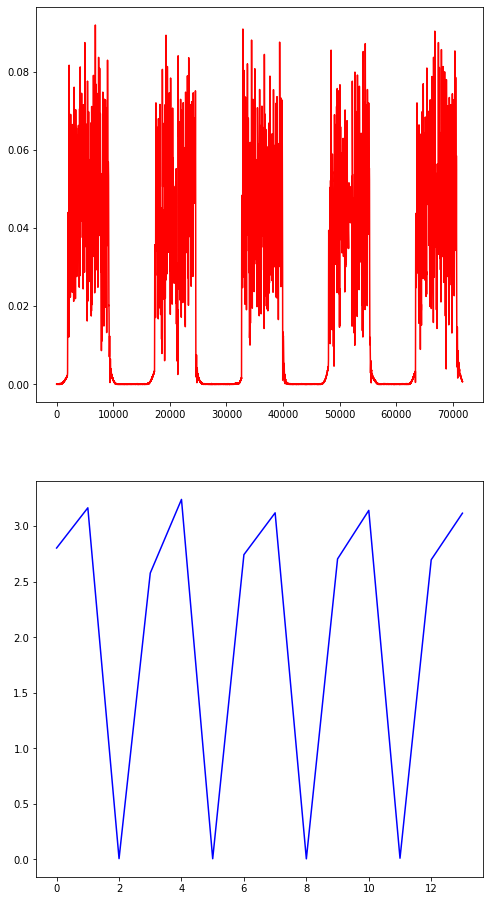

In [12]:
plt.figure(figsize=(8, 16))
plt.subplot(211)
plt.plot(np.abs(data), color = 'r')
plt.subplot(212)
plt.plot(norm, color = 'b')
plt.show()

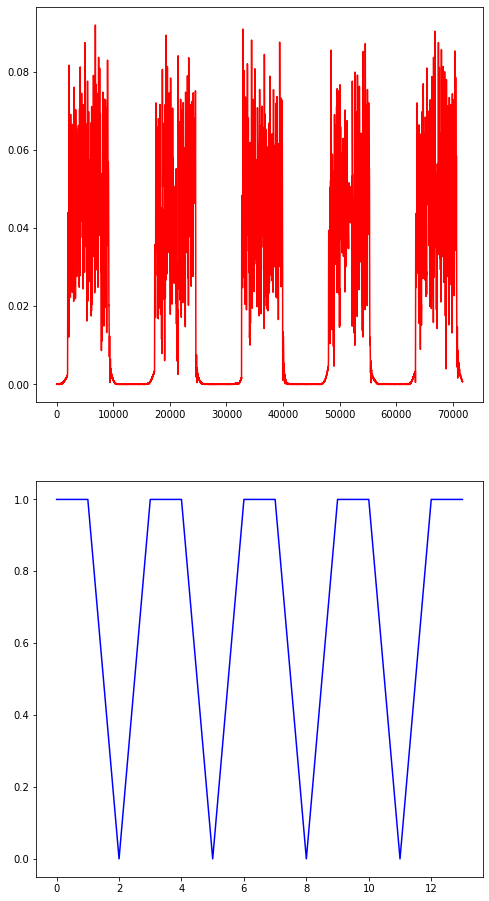

In [13]:
mask = norm > 1

plt.figure(figsize=(8, 16))
plt.subplot(211)
plt.plot(np.abs(data), color = 'r')
plt.subplot(212)
plt.plot(mask, color = 'b')
plt.show()

In [14]:
data3 = data2 * mask.reshape(-1, 1)
data4 = data3.reshape(-1)
print(f'{data4.shape} == {data.shape}')

(71680,) == (71680,)


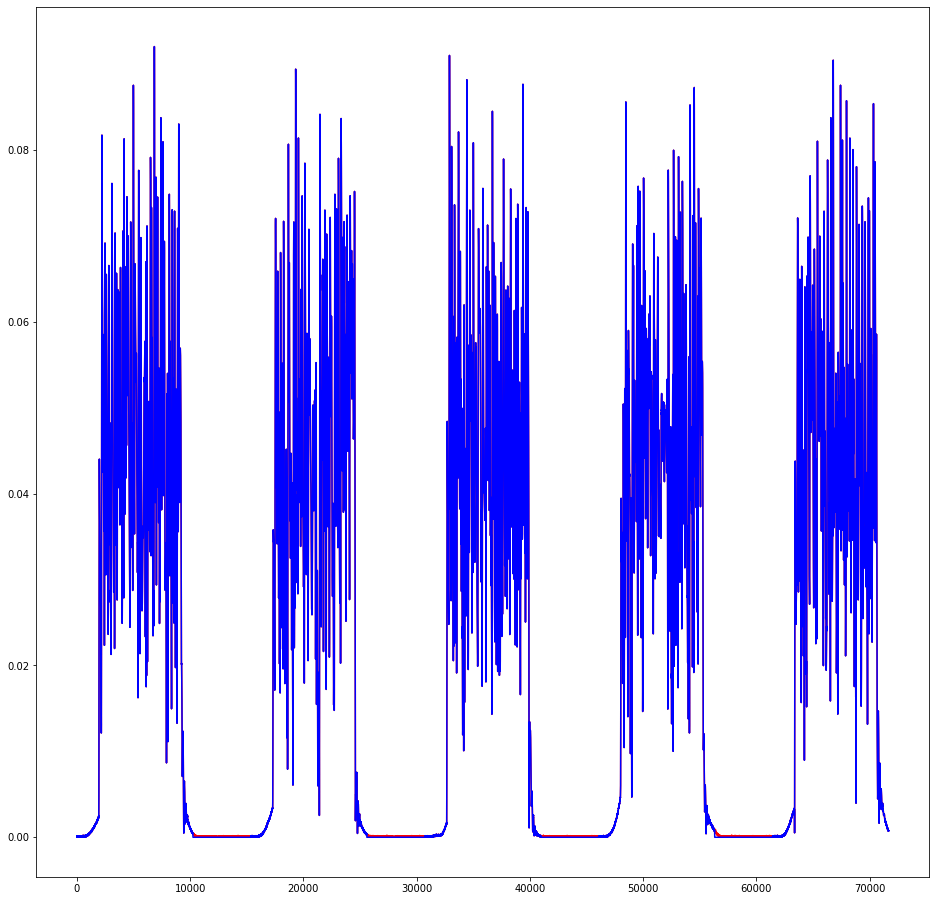

In [15]:

plt.figure(figsize=(16, 16))
plt.plot(np.abs(data), color = 'r')
plt.plot(np.abs(data4), color = 'b')
plt.show()